In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection

In [140]:
df = pd.read_csv('data/processed/observed_time_series.csv', index_col=0, parse_dates=True).drop('Observed', axis=1)
gen = pd.read_csv('data/processed/generated.csv', index_col=0, parse_dates=True).iloc[:, 0]
df['Generated'] = gen
df.columns = ['Real', 'Generated']
df

,Real,Generated
1974-01-01 00:00:00,50.940187,40.482704
1974-01-01 01:00:00,49.055235,38.221806
1974-01-01 02:00:00,48.608172,36.132202
1974-01-01 03:00:00,47.388910,32.789696
1974-01-01 04:00:00,47.196911,31.906300
...,...,...
2023-12-31 12:00:00,58.187648,62.279060
2023-12-31 13:00:00,60.544047,64.375170
2023-12-31 14:00:00,61.010524,67.790960
2023-12-31 15:00:00,61.064883,69.049260


## Descriptive Plots

Plot seasonal and diurnal profiles along with autocorrelation.

In [141]:
def autocorrelation(x):
    slope = np.polyfit(x[:-1], x[1:], 1)[0]
    return slope

In [26]:
hourly_correlation_real = autocorrelation(df.Real)
daily_correlation_real = autocorrelation(df.Real.resample('D').mean())
monthly_correlation_real = autocorrelation(df.Real.resample('MS').mean())

hourly_correlation_gen = autocorrelation(df.Generated)
daily_correlation_gen = autocorrelation(df.Generated.resample('D').mean())
monthly_correlation_gen = autocorrelation(df.Generated.resample('MS').mean())

data = {
    'Hourly': [hourly_correlation_real, hourly_correlation_gen],
    'Daily': [daily_correlation_real, daily_correlation_gen],
    'Monthly': [monthly_correlation_real, monthly_correlation_gen]
}
corr_df = pd.DataFrame(data=data, index=['Real', 'Generated']).T
corr_df

,Real,Generated
Hourly,0.985095,0.988923
Daily,0.981975,0.978370
Monthly,0.842166,0.851635


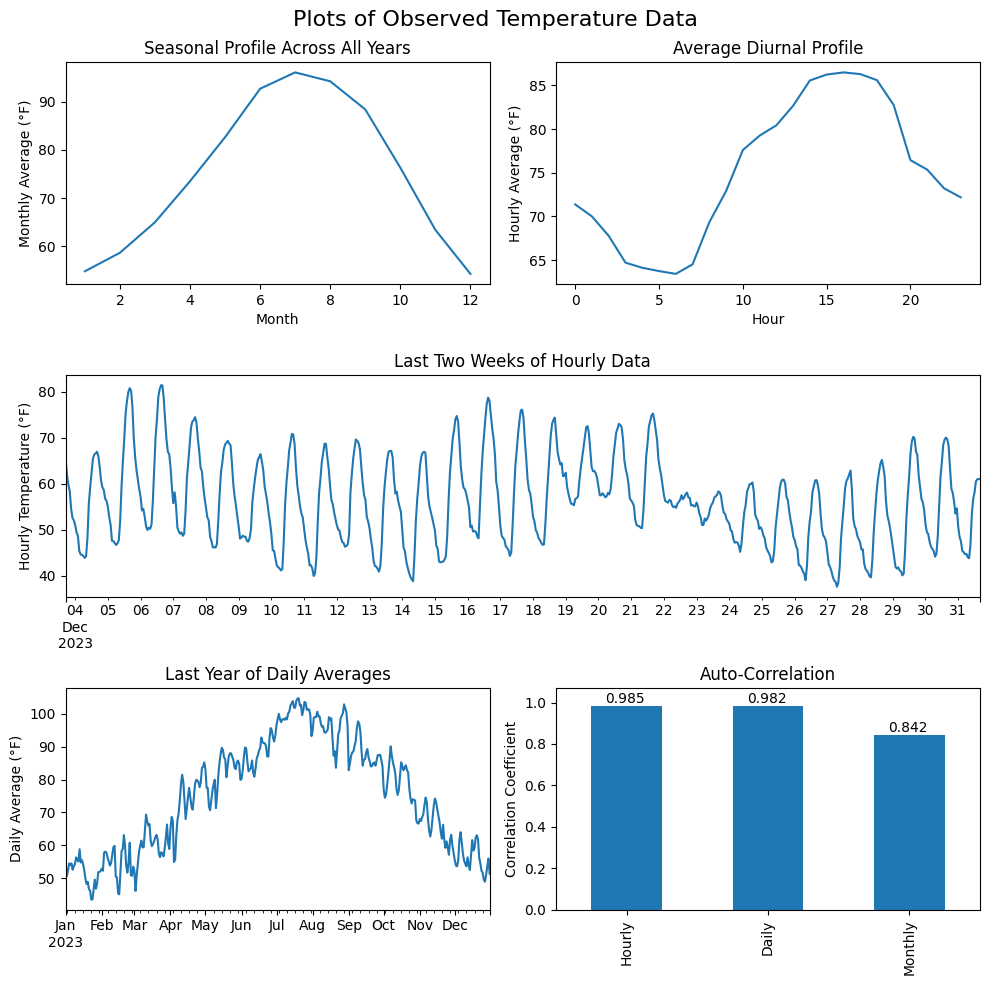

In [152]:
# Create a GridSpec with 3 rows and 2 columns

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 2)

# Top row: 2 plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Middle row: 1 wide plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])

# Bottom row: 2 plots
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Plot seasonal profile
df.iloc[:,0].groupby(df.index.month).mean().plot(ax=ax1)
ax1.set_title('Seasonal Profile Across All Years')
ax1.set_ylabel('Monthly Average (°F)')
ax1.set_xlabel('Month')

# Plot diurnal profile
df.iloc[:,0].groupby(df.index.hour).mean().plot(ax=ax2)
ax2.set_title('Average Diurnal Profile')
ax2.set_ylabel('Hourly Average (°F)')
ax2.set_xlabel('Hour')

# Plot last two weeks of hourly data
df.iloc[-24*28:, 0].plot(ax=ax3, title='Last Two Weeks of Hourly Data')
# set y-axis label
ax3.set_ylabel('Hourly Temperature (°F)')

# Plot the last year of daily averages
df.resample('D').mean().iloc[-365:, 0].plot(ax=ax4, title='Last Year of Daily Averages')
# set y-axis label
ax4.set_ylabel('Daily Average (°F)')

# Plot correlation
# ax5.bar(corr_df.index, corr_df)
corr_df.iloc[:,0].plot(kind='bar', ax=ax5)
# set y-axis label
ax5.set_ylabel('Correlation Coefficient')
ax5.set_title('Auto-Correlation')
for i, value in enumerate(corr_df['Real']):
    ax5.text(i-0.01, value, f'{value:.3f}', ha='center', va='bottom')
# for i, value in enumerate(corr_df['Generated']):
#     ax5.text(i+0.01, value, f'{value:.3f}', ha='left', va='bottom')

plt.ylim(bottom=0, top=1.07)

# add title to entire figure
fig.suptitle('Plots of Observed Temperature Data', fontsize=16)

plt.tight_layout()
plt.savefig('images/seasonal_diurnal_correlation.png', dpi=300)
plt.show()


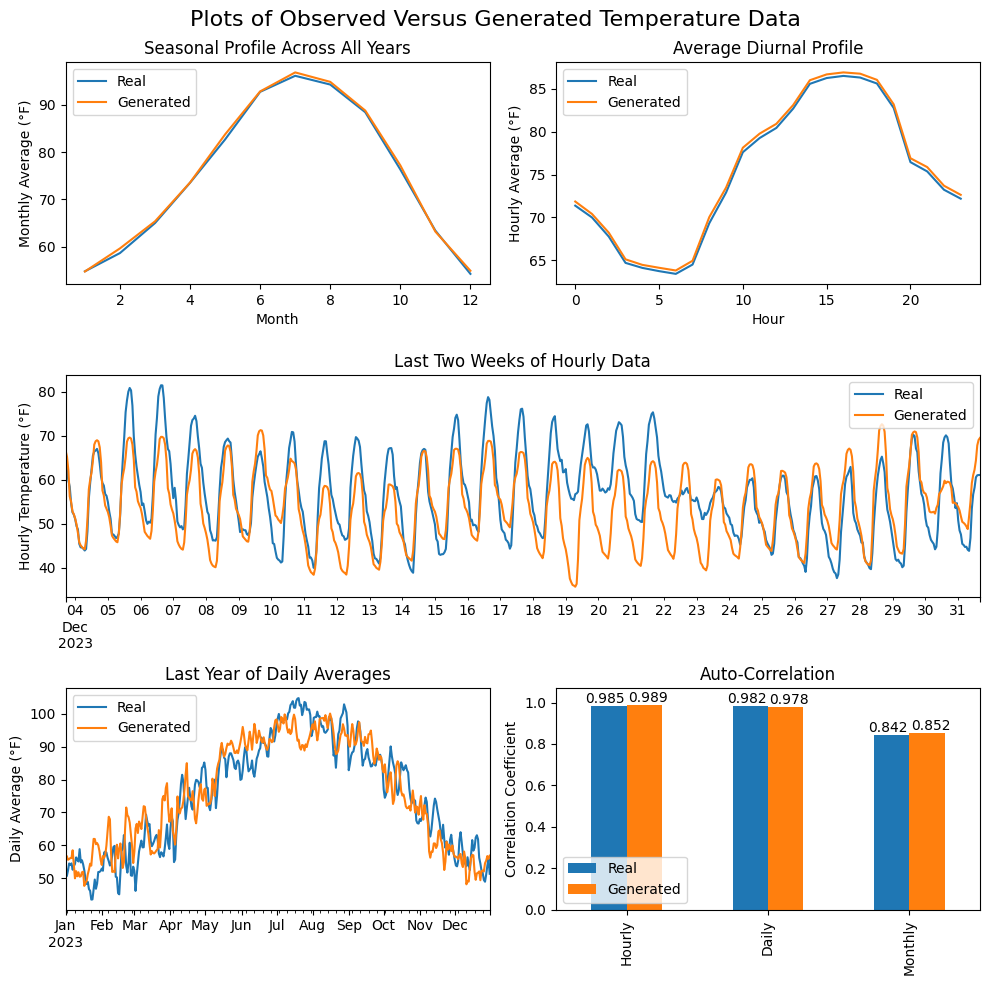

In [153]:
# Create a GridSpec with 3 rows and 2 columns
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 2)

# Top row: 2 plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Middle row: 1 wide plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])

# Bottom row: 2 plots
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Plot seasonal profile
df.groupby(df.index.month).mean().plot(ax=ax1)
ax1.set_title('Seasonal Profile Across All Years')
ax1.set_ylabel('Monthly Average (°F)')
ax1.set_xlabel('Month')

# Plot diurnal profile
df.groupby(df.index.hour).mean().plot(ax=ax2)
ax2.set_title('Average Diurnal Profile')
ax2.set_ylabel('Hourly Average (°F)')
ax2.set_xlabel('Hour')

# Plot last two weeks of hourly data
df.iloc[-24*28:].plot(ax=ax3, title='Last Two Weeks of Hourly Data')
# set y-axis label
ax3.set_ylabel('Hourly Temperature (°F)')

# Plot the last year of daily averages
df.resample('D').mean().iloc[-365:].plot(ax=ax4, title='Last Year of Daily Averages')
# set y-axis label
ax4.set_ylabel('Daily Average (°F)')

# Plot correlation
# ax5.bar(corr_df.index, corr_df)
corr_df.plot(kind='bar', ax=ax5)
# set y-axis label
ax5.set_ylabel('Correlation Coefficient')
ax5.set_title('Auto-Correlation')
for i, value in enumerate(corr_df['Real']):
    ax5.text(i-0.01, value, f'{value:.3f}', ha='right', va='bottom')
for i, value in enumerate(corr_df['Generated']):
    ax5.text(i+0.01, value, f'{value:.3f}', ha='left', va='bottom')

plt.ylim(bottom=0, top=1.07)

fig.suptitle('Plots of Observed Versus Generated Temperature Data', fontsize=16)

plt.tight_layout()
plt.savefig('images/seasonal_diurnal_correlation_with_gen.png', dpi=300)
plt.show()
